In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from scipy.stats import ttest_rel
from itertools import combinations
import statsmodels.stats.multitest as smm
from scipy.stats import f_oneway

In [3]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [4]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [5]:
base_directory="./TPR_GAPS/"


In [6]:
seed_19_sex = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.590641,0.024971,0.409359,-0.024971
1,Cardiomegaly,0.590760,0.034189,0.409240,-0.034189
2,Lung Opacity,0.586707,0.026680,0.413293,-0.026680
3,Lung Lesion,0.579168,0.053898,0.420832,-0.053898
4,Edema,0.583372,0.021494,0.416628,-0.021494


In [7]:
seed_19_age = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.388536,0.018211,0.260563,0.000000,0.090413,-0.018666,0.196880,0.036415,0.005982,-0.026321
1,Cardiomegaly,0.291435,0.014136,0.191014,-0.006619,0.062713,-0.021573,0.153373,0.026771,0.004546,0.000000
2,Lung Opacity,0.300723,0.024984,0.205451,0.000000,0.075250,-0.014694,0.140990,0.029567,0.004839,-0.002766
3,Lung Lesion,0.330440,0.039869,0.233463,0.000000,0.128405,0.032984,0.111045,-0.021899,0.006884,-0.076979
4,Edema,0.309994,0.025760,0.198770,-0.000389,0.071212,0.000000,0.159677,0.032086,0.004680,-0.042728


In [8]:
seed_19_race = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.652582,0.024996,0.067697,-0.041410,0.029683,-0.024996,0.131228,0.067900,0.104574,0.076195,0.014236,-0.033246
1,Cardiomegaly,0.653340,-0.008191,0.096945,-0.104322,0.039580,-0.134464,0.110517,0.083168,0.087919,0.095296,0.011700,0.008191
2,Lung Opacity,0.665128,0.003401,0.087931,-0.136037,0.033370,-0.109411,0.112625,0.104477,0.089933,0.121934,0.011012,-0.003401


In [9]:
diseases = ['Lung Opacity', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']

diseases_abbr = {'Cardiomegaly': 'Cardiomegaly',
                'Effusion': 'Effusion',
                'Enlarged Cardiomediastinum': 'Enlarged Card.',
                'Lung Lesion': 'Lung Lesion',
                'Atelectasis': 'Atelectasis',
                'Pneumonia': 'Pneumonia',
                'Pneumothorax': 'Pneumothorax',
                'Consolidation': 'Consolidation',
                'Edema': 'Edema',
                'Pleural Effusion': 'Effusion',
                'Pleural Other': 'Pleural Other',
                'Fracture': 'Fracture',
                'Support Devices': 'Sup. Devices',
                'Lung Opacity': 'Air. Opacity',
                }


## 1. Gender

In [10]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)


In [11]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [12]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [13]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [14]:
for disease in diseases:
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [15]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
6,Fracture,Fracture,0.007424,0.580007,0.003712,0.004315,0.419993,-0.003712,0.004315
8,Pleural Effusion,Effusion,0.020991,0.587992,0.010496,0.006633,0.412008,-0.010496,0.006633
10,Pneumonia,Pneumonia,0.021878,0.592688,-0.010939,0.007882,0.407312,0.010939,0.007882
3,Consolidation,Consolidation,0.023437,0.590824,-0.011718,0.003952,0.409176,0.011718,0.003952
12,Support Devices,Sup. Devices,0.024627,0.602018,0.012313,0.002043,0.397982,-0.012313,0.002043
11,Pneumothorax,Pneumothorax,0.028360,0.589968,-0.014180,0.005093,0.410032,0.014180,0.005093
4,Edema,Edema,0.040258,0.583372,0.020129,0.001994,0.416628,-0.020129,0.001994
9,Pleural Other,Pleural Other,0.044211,0.585197,0.022106,0.008433,0.414803,-0.022106,0.008433
5,Enlarged Cardiomediastinum,Enlarged Card.,0.047988,0.590641,0.023994,0.003338,0.409359,-0.023994,0.003338
0,Lung Opacity,Air. Opacity,0.056240,0.586707,0.028120,0.003342,0.413293,-0.028120,0.003342


In [16]:
sex_tpr_disp_df.to_csv(base_directory+"sex_tpr_disp_img.csv")

In [63]:

# Extract just the Gap columns in the right order
gap_cols = ['Gap_M_mean', 'Gap_F_mean']

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = sex_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.3f}, p={pvals[i]:.3f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_M_mean vs Gap_F_mean: t=2.760, p=0.017, corrected_p=0.0173, significant=True


In [61]:

df = sex_tpr_disp_df

# Define the columns to use
gap_cols = ['Gap_M_mean','Gap_F_mean']

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_M = gap_df['Gap_M_mean'].tolist()
group_F = gap_df['Gap_F_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_M, group_F)

# Show results

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 15.238, p-value = 0.001 significant=True


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


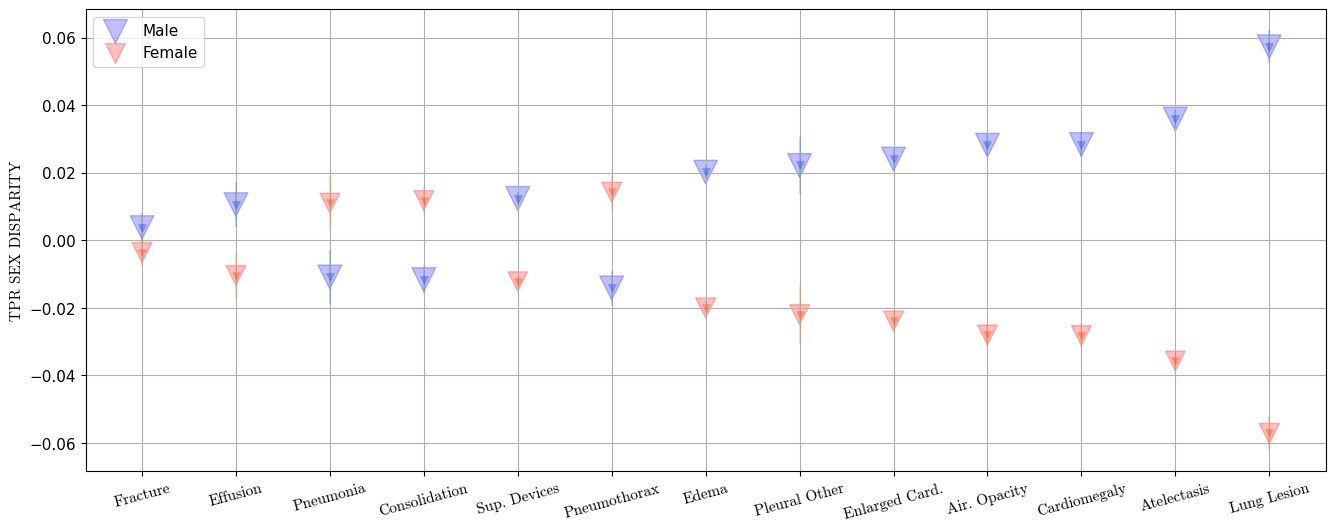

In [18]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='v',color='blue', label="Male",alpha=0.25)
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='v',mfc='blue',alpha=0.25)
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='v',color='red', label="Female",alpha=0.25)
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='v',mfc='red',alpha=0.25)

plt.xticks(rotation=rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_SEX.pdf")


## 2. Age

In [19]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [20]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [21]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [23]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [24]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [25]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [26]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [27]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [28]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [29]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv(base_directory+"age_tpr_disp_img.csv")

In [30]:
age_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%40-60', 'Gap_40-60_mean',
       'CI_40-60', '%60-80', 'Gap_60-80_mean', 'CI_60-80', '%20-40',
       'Gap_20-40_mean', 'CI_20-40', '%80-', 'Gap_80-_mean', 'CI_80-', '%0-20',
       'Gap_0-20_mean', 'CI_0-20'],
      dtype='object')

In [31]:

# Extract just the Gap columns in the right order
gap_cols = ['Gap_0-20_mean', 'Gap_20-40_mean', 'Gap_40-60_mean','Gap_60-80_mean', 'Gap_80-_mean']

ci_cols = ['CI_0-20', 'CI_20-40', 'CI_40-60', 'CI_60-80','CI_80-']

gap_df = age_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")
    

#  ANOVA

groups = [gap_df[col] for col in gap_cols]
anova_result = f_oneway(*groups)

anova_result.pvalue, anova_result.statistic

print(f"ANOVA result: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f} significant={anova_result.pvalue < 0.05}")


Gap_0-20_mean vs Gap_20-40_mean: t=-1.1408, p=0.2762, corrected_p=1.0000, significant=False
Gap_0-20_mean vs Gap_40-60_mean: t=-1.7249, p=0.1102, corrected_p=1.0000, significant=False
Gap_0-20_mean vs Gap_60-80_mean: t=-2.1872, p=0.0493, corrected_p=0.4926, significant=False
Gap_0-20_mean vs Gap_80-_mean: t=-0.9419, p=0.3648, corrected_p=1.0000, significant=False
Gap_20-40_mean vs Gap_40-60_mean: t=-1.8811, p=0.0844, corrected_p=0.8444, significant=False
Gap_20-40_mean vs Gap_60-80_mean: t=-3.1566, p=0.0083, corrected_p=0.0827, significant=False
Gap_20-40_mean vs Gap_80-_mean: t=0.0140, p=0.9891, corrected_p=1.0000, significant=False
Gap_40-60_mean vs Gap_60-80_mean: t=-2.2533, p=0.0437, corrected_p=0.4374, significant=False
Gap_40-60_mean vs Gap_80-_mean: t=0.8380, p=0.4184, corrected_p=1.0000, significant=False
Gap_60-80_mean vs Gap_80-_mean: t=2.1553, p=0.0521, corrected_p=0.5215, significant=False
ANOVA result: F-statistic = 2.8434, p-value = 0.0317 significant=True


In [32]:
age_tpr_disp_df

,diseases,diseases_abbr,Distance,%40-60,Gap_40-60_mean,CI_40-60,%60-80,Gap_60-80_mean,CI_60-80,%20-40,Gap_20-40_mean,CI_20-40,%80-,Gap_80-_mean,CI_80-,%0-20,Gap_0-20_mean,CI_0-20
8,Pleural Effusion,Effusion,0.029706,0.173672,0.000171,0.000334,0.264187,0.009241,0.003330,0.055556,-0.009804,0.005770,0.124002,0.007783,0.006464,0.004133,-0.020465,0.006286
1,Atelectasis,Atelectasis,0.039075,0.197654,0.000000,0.000000,0.295261,0.018005,0.002255,0.067291,-0.009871,0.006982,0.136822,0.018508,0.003270,0.004613,-0.020567,0.012207
3,Consolidation,Consolidation,0.039502,0.249975,0.005860,0.006464,0.379935,0.009191,0.005933,0.092449,-0.012804,0.006934,0.172787,0.002737,0.005364,0.005415,-0.030312,0.021395
0,Lung Opacity,Air. Opacity,0.043316,0.205451,-0.001596,0.002719,0.300723,0.020519,0.002692,0.075250,-0.016091,0.001398,0.140990,0.027226,0.002409,0.004839,-0.008827,0.009944
2,Cardiomegaly,Cardiomegaly,0.052947,0.191014,-0.010900,0.006463,0.291435,0.010804,0.008524,0.062713,-0.023263,0.007192,0.153373,0.029684,0.009657,0.004546,0.000059,0.003803
5,Enlarged Cardiomediastinum,Enlarged Card.,0.078220,0.260563,0.000000,0.000000,0.388536,0.018567,0.001531,0.090413,-0.021141,0.002001,0.196880,0.034029,0.003907,0.005982,-0.044191,0.021199
12,Support Devices,Sup. Devices,0.087242,0.200121,0.000000,0.000000,0.254314,0.001420,0.000891,0.078725,-0.010811,0.002767,0.096312,-0.042466,0.003827,0.005899,0.044775,0.007544
6,Fracture,Fracture,0.090049,0.251621,-0.004204,0.008240,0.373763,0.029504,0.007723,0.104401,-0.017961,0.006821,0.192085,0.014907,0.010813,0.006653,-0.060545,0.051332
4,Edema,Edema,0.104449,0.198770,-0.001744,0.002890,0.309994,0.025816,0.002461,0.071212,-0.001867,0.002273,0.159677,0.034207,0.003221,0.004680,-0.070241,0.014044
7,Lung Lesion,Lung Lesion,0.131703,0.233463,0.000000,0.000000,0.330440,0.048871,0.005075,0.128405,0.037995,0.010347,0.111045,-0.022220,0.010907,0.006884,-0.082832,0.008677


In [33]:

df = age_tpr_disp_df

# Define the columns to use
gap_cols = [
    'Gap_0-20_mean',
    'Gap_20-40_mean',
    'Gap_40-60_mean',
    'Gap_60-80_mean',
    'Gap_80-_mean'
]

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_0_20 = gap_df['Gap_0-20_mean'].tolist()
group_20_40 = gap_df['Gap_20-40_mean'].tolist()
group_40_60 = gap_df['Gap_40-60_mean'].tolist()
group_60_80 = gap_df['Gap_60-80_mean'].tolist()
group_80 = gap_df['Gap_80-_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_0_20, group_20_40, group_40_60, group_60_80,group_80)

# Show results

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 2.843, p-value = 0.032 significant=True


In [34]:
plt.rcParams.update({'font.size': font_size})

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


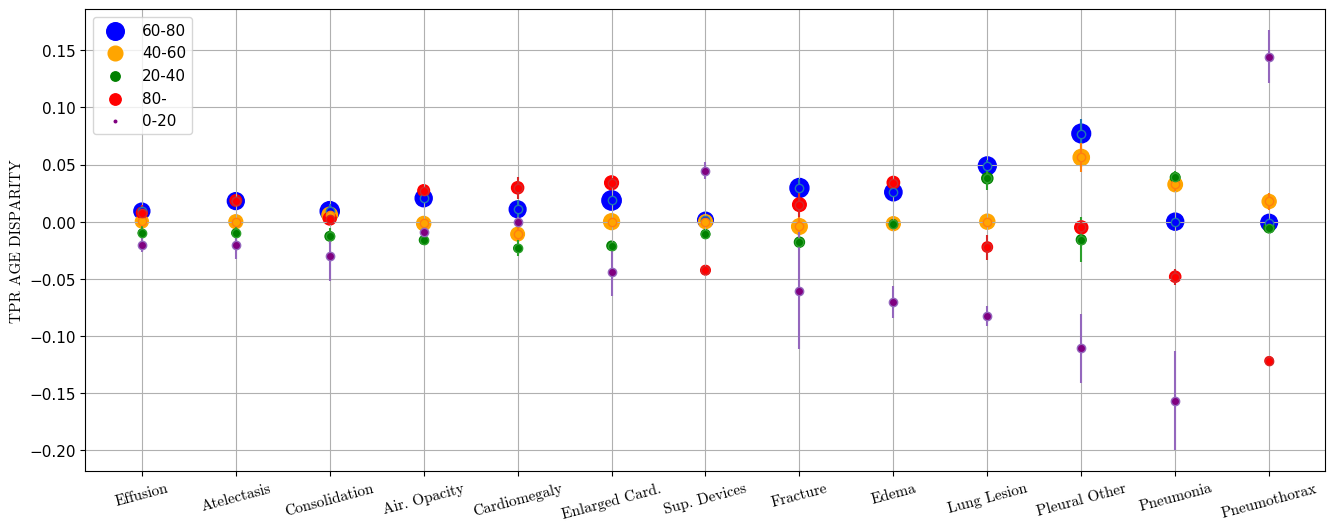

In [35]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_AGE.pdf")

## 3. Race

In [36]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [37]:
result_race_grouped_stat

%White                                     \
                            count      mean  std       min       25%   
diseases                                                               
Atelectasis                   5.0  0.677256  0.0  0.677256  0.677256   
Cardiomegaly                  5.0  0.653340  0.0  0.653340  0.653340   
Consolidation                 5.0  0.666732  0.0  0.666732  0.666732   
Edema                         5.0  0.662935  0.0  0.662935  0.662935   
Enlarged Cardiomediastinum    5.0  0.652582  0.0  0.652582  0.652582   
Fracture                      5.0  0.660525  0.0  0.660525  0.660525   
Lung Lesion                   5.0  0.656690  0.0  0.656690  0.656690   
Lung Opacity                  5.0  0.665128  0.0  0.665128  0.665128   
No Finding                    5.0  0.609506  0.0  0.609506  0.609506   
Pleural Effusion              5.0  0.688384  0.0  0.688384  0.688384   
Pleural Other                 5.0  0.619892  0.0  0.619892  0.619892   
Pneumonia                     5.0  0.658039  0.0  0.658039  0.658039   
Pneumothorax                  5.0  0.728803  0.0  0.728803  0.728803   
Support Devices               5.0  0.679420  0.0  0.679420  0.679420   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.677256  0.677256  0.677256       5.0  0.007242   
Cardiomegaly                0.653340  0.653340  0.653340       5.0 -0.006330   
Consolidation               0.666732  0.666732  0.666732       5.0  0.018273   
Edema                       0.662935  0.662935  0.662935       5.0  0.013047   
Enlarged Cardiomediastinum  0.652582  0.652582  0.652582       5.0  0.023395   
Fracture                    0.660525  0.660525  0.660525       5.0  0.027808   
Lung Lesion                 0.656690  0.656690  0.656690       5.0 -0.036026   
Lung Opacity                0.665128  0.665128  0.665128       5.0  0.005368   
No Finding                  0.609506  0.609506  0.609506       5.0 -0.061274   
Pleural Effusion            0.688384  0.688384  0.688384       5.0  0.023858   
Pleural Other               0.619892  0.619892  0.619892       5.0  0.004635   
Pneumonia                   0.658039  0.658039  0.658039       5.0 -0.036493   
Pneumothorax                0.728803  0.728803  0.728803       5.0 -0.001924   
Support Devices             0.679420  0.679420  0.679420       5.0 -0.006796   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.010677  0.010677          5.0 -0.007242   
Cardiomegaly                ...  0.011700  0.011700          5.0  0.006330   
Consolidation               ...  0.010338  0.010338          5.0 -0.018581   
Edema                       ...  0.011930  0.011930          5.0 -0.030855   
Enlarged Cardiomediastinum  ...  0.014236  0.014236          5.0 -0.036411   
Fracture                    ...  0.012965  0.012965          5.0 -0.033471   
Lung Lesion                 ...  0.012272  0.012272          5.0  0.119500   
Lung Opacity                ...  0.011012  0.011012          5.0 -0.005368   
No Finding                  ...  0.013053  0.013053          5.0 -0.097413   
Pleural Effusion            ...  0.010649  0.010649          5.0 -0.032434   
Pleural Other               ...  0.015806  0.015806          5.0  0.025172   
Pneumonia                   ...  0.011808  0.011808          5.0  0.036493   
Pneumothorax                ...  0.005502  0.005502          5.0  0.115650   
Support Devices             ...  0.012570  0.012570          5.0  0.014950   

                                                                              \
                                 s

In [38]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [39]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [40]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [41]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [42]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [43]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [44]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [45]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [46]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []

ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [47]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }

print(d)


{'diseases': ['Lung Opacity', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'], 'diseases_abbr': ['Air. Opacity', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Card.', 'Fracture', 'Lung Lesion', 'Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Sup. Devices'], 'Distance': [0.24959614344271425, 0.2531553421472773, 0.20308627068132762, 0.2543030690537083, 0.14377630325416582, 0.1167213396251783, 0.2232962561041779, 0.26544715447154466, 0.09400318190924184, 0.2910380561014828, 0.3763600395647873, 0.2855203619909502, 0.037816187018424235], '%White': [0.6651279199110123, 0.6772556514861926, 0.6533395734438724, 0.6667323028453284, 0.662934752684225, 0.6525821596244131, 0.6605254179460934, 0.6566896138880575, 0.6883844752697211, 0.6198920585967618, 0.6580394694273698, 0.7288025889967638, 0.679420034180495], 'Gap_W_m

In [48]:
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv(base_directory+"race_tpr_disp_img.csv")

In [49]:

# Extract just the Gap columns in the right order
gap_cols = [
    'Gap_W_mean', 'Gap_B_mean', 'Gap_H_mean',
    'Gap_Ot_mean', 'Gap_As_mean','Gap_Am_mean'
]

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = race_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")



Gap_W_mean vs Gap_B_mean: t=6.9945, p=0.0000, corrected_p=0.0002, significant=True
Gap_W_mean vs Gap_H_mean: t=5.7837, p=0.0001, corrected_p=0.0013, significant=True
Gap_W_mean vs Gap_Ot_mean: t=-4.1673, p=0.0013, corrected_p=0.0196, significant=True
Gap_W_mean vs Gap_As_mean: t=-4.6651, p=0.0005, corrected_p=0.0082, significant=True
Gap_W_mean vs Gap_Am_mean: t=-0.4717, p=0.6456, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_H_mean: t=-0.6131, p=0.5513, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_Ot_mean: t=-6.7303, p=0.0000, corrected_p=0.0003, significant=True
Gap_B_mean vs Gap_As_mean: t=-6.3780, p=0.0000, corrected_p=0.0005, significant=True
Gap_B_mean vs Gap_Am_mean: t=-4.9488, p=0.0003, corrected_p=0.0051, significant=True
Gap_H_mean vs Gap_Ot_mean: t=-6.0294, p=0.0001, corrected_p=0.0009, significant=True
Gap_H_mean vs Gap_As_mean: t=-5.7714, p=0.0001, corrected_p=0.0013, significant=True
Gap_H_mean vs Gap_Am_mean: t=-3.2165, p=0.0074, corrected_p=0.1110, 

In [56]:

df = race_tpr_disp_df

# Define the columns to use
gap_cols = [
    'Gap_W_mean',
    'Gap_B_mean',
    'Gap_H_mean',
    'Gap_Ot_mean',
    'Gap_As_mean',
    'Gap_Am_mean'
]

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_W = gap_df['Gap_W_mean'].tolist()
group_B = gap_df['Gap_B_mean'].tolist()
group_H = gap_df['Gap_H_mean'].tolist()
group_O = gap_df['Gap_Ot_mean'].tolist()
group_A = gap_df['Gap_As_mean'].tolist()
group_Am = gap_df['Gap_Am_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_W, group_B, group_H, group_O,group_A,group_Am)

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 27.344, p-value = 0.000 significant=True


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


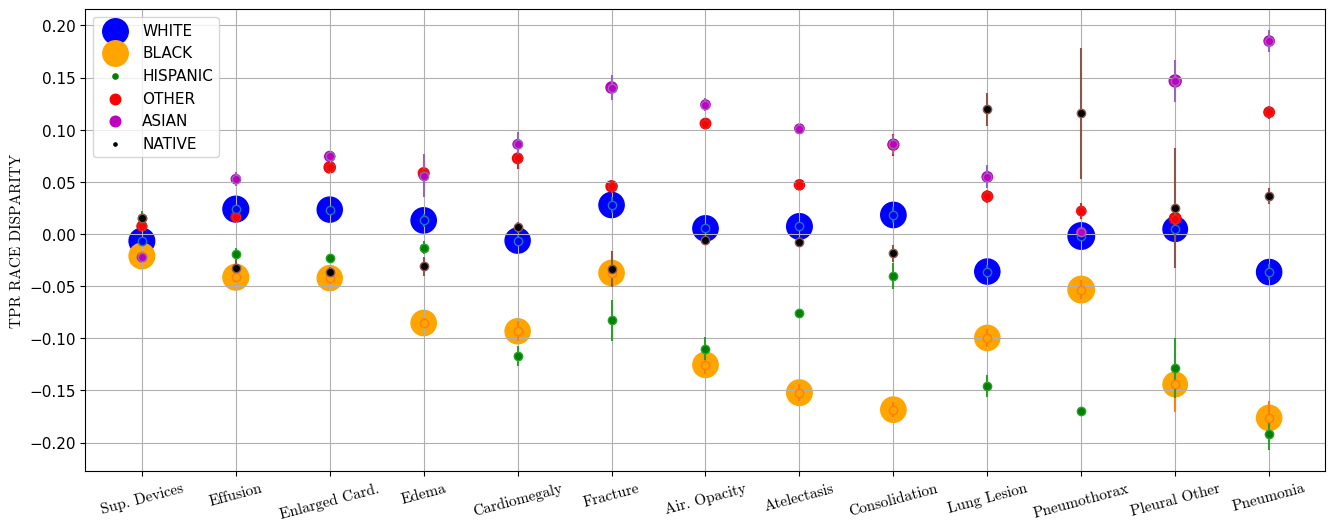

In [50]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size, fontname='cmr10')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size, fontname='cmr10')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_RACE.pdf")